# Binäre Suchbäume

In diesem Notebook schauen wir uns die Symboltabellenimplementation mit binären Suchbäumen an. Binäre Suchbäume verlangen, dass auf der Menge der Schlüssel eine Ordnungsrelation definiert ist. Bevor wir binäre Suchbäume besprechen, diskutieren wir deshalb kurz, wie wir in Python eine Ordnungsrelation auf einem Datentypen definieren können.

### Ordnungsrelationen

Bei den von Python vordefinierten Datentypen, ist die Ordnungsrelation, falls diese Sinn macht, direkt von der Sprache unterstützt. Zum Beispiel können wir bei Strings die folgenden Vergleiche machen.

In [45]:
"AA" < "AB"

True

In [46]:
"AB" > "AA"

True

Für benutzerdefinierte Typen weiss Python natürlich nicht, wie eine Ordungsrelation definiert sein müsste. Entsprechend gibt uns Python eine Fehlermeldung, wenn wir einen Vergleichsoperator nutzen.

In [47]:
class Date:
    def __init__(self, day, month, year):
        self.day = day
        self.month = month
        self.year = year

In [48]:
d1 = Date(1, 1, 1970)
d2 = Date(1, 1, 2018)
d1 > d2

TypeError: '>' not supported between instances of 'Date' and 'Date'

Um diese Operation zu unterstützen, müssen wir die Python Methode ```__lt__``` implementieren und die Klasse mittels der Annotation ```@total_ordering``` als geordnet kennzeichnen. 

*(Alternativ können wir auch alle funktionen ```__lt__```, ```__le__```, ```__gt__``` und ```__ge__``` implementieren)*

In [49]:
from functools import total_ordering

@total_ordering
class Date:
    def __init__(self, day, month, year):
        self.day = day
        self.month = month
        self.year = year
        
    def __eq__(self, rhs):
        return self.day == rhs.day \
            and self.month == rhs.month \
            and self.year == rhs.year
    def __lt__(self, rhs):
        return self.year < rhs.year \
            or (self.year == rhs.year and self.month < rhs.month) \
            or (self.year == rhs.year and self.month == rhs.month) \
            and self.day < rhs.day

Nun stehen uns die üblichen Vergleichsoperationen zur Verfügung.

In [50]:
d1 = Date(1, 1, 1970)
d2 = Date(1, 1, 2018)
d1 < d2

True

In [51]:
d1 >= d1

True

## Repräsentation binärer Suchbäume

Nun können wir die Implementation der Symboltabelle mittels einem binären Suchbaums besprechen. Wir nehmen an, dass die Schlüssel wie oben besprochen, eine Ordnungsrelation unterstützen. 

Die Klasse ```BST``` zeigt die Implementation. Intern wird die Klasse ```Node``` für die Repräsentation der Knoten benutzt. Wir speichern uns auch in jedem Knoten die Grösse des entsprechenden Unterbaums. Der leere Baum wird durch das Symbol ```None``` definiert. 
Die grundlegenden Operationen einer Symboltabelle, ```size```, ```isEmpty```, ```put```, ```get```, ```contains```, ```keys``` können wir jeweils mit wenigen Zeilen Code definieren. Beachten Sie, dass wir für jede Methode in der Symboltabelle jeweils eine Hilfsmethode definieren, die eine Referenz auf den Wurzelknoten des Baumes bekommt, und die Operation dann rekursiv (der Datenstruktur folgend) implementiert. 

In [52]:
class BST:
    
    class Node:
        def __init__(self, key, value, count = 1):
            self.key = key
            self.value = value
            self.left = None
            self.right = None
            self.count = count
    
    def __init__(self):
        self.root = None
    
    def size(self):
        return self._size(self.root)
    
    def _size(self, root):
        if (root == None):
            return 0
        else:
            return root.count
    
    def isEmpty(self):
        return self.size() == 0
    
    def contains(self, key):
        return self.get != None
    
    def get(self, key): 
        return self._get(key, self.root)
    
    def _get(self, key, node):
        if node == None:
            return None
        elif key < node.key:
            return self._get(key, node.left)
        elif key > node.key:
            return self._get(key, node.right)
        elif key == node.key:
            return node.value
        else:
            raise Exception("should never reach this line")
            
    def put(self, key, value):
        self.root = self._put(key, value, self.root)
    
    def _put(self, key, value, node):
        if (node == None):
            return BST.Node(key, value, 1)
        elif key < node.key:
            node.left = self._put(key, value, node.left)
        elif key > node.key:
            node.right = self._put(key, value, node.right)
        elif key == node.key:
            node.value = value
        node.count = 1 + self._size(node.left) + self._size(node.right)
        return node
        
    def keys(self):
        return self._keys(self.root, [])
        
    def _keys(self, node, keylist):        
        if node == None:
            return keylist
        else:
            self._keys(node.left, keylist)
            keylist.append(node.key)
            self._keys(node.right, keylist)
            return keylist
        
    def height(self):
        return self._height(self.root)
    
    def _height(self, node):
        if node == None:
            return -1
        else:
            return 1 + max(self._height(node.left), self._height(node.right))

Um die Implementation zu testen, schreiben wir uns einen kleinen Testclient:

In [63]:
string = "SEARCHEXAMPLE"
st = BST()
for (pos, char) in enumerate(string):
    st.put(char, pos)

for k in st.keys():
    print("key: " +str(k) + " Wert: " +str(st.get(k)))

key: A Wert: 8
key: C Wert: 4
key: E Wert: 12
key: H Wert: 5
key: L Wert: 11
key: M Wert: 9
key: P Wert: 10
key: R Wert: 3
key: S Wert: 0
key: X Wert: 7


>Schauen Sie sich die Methoden ```get``` und ```put``` genau an und stellen Sie sicher, dass Sie diese verstehen. Beachten Sie insbesondere wie beim ```put``` nach dem Einfügen jeweils wieder die Verweise richtig gesetzt werden und wie das Feld ```count``` aktualisiert wird. Falls Ihnen etwas unklar ist, instrumentieren Sie den Code mit ```print``` statements und testen Sie die Methoden an einfachen Beispielen. 


##### Übung:

* Schauen Sie sich die Methode ```keys``` an. Welche Traversierungsstrategie (inorder, postorder, preorder) wird hier gewählt? Weshalb?

***Ihre Antworten***

* Ihre Antwort

### Experimente mit Binärsuchbäumen

Um die Funktionsweise von Binären Bäumen besser verstehen zu können ist es hilfreich, diese zu visualisieren. 
Dazu definieren wir uns die Visualisierungsfunktion ```showTree```, welche den Baum zeichnet und in den Knoten den entsprechenden Schlüssel anzeigt. Sie müssen die Details davon nicht verstehen, sondern können die Methode ```showTree``` einfach als Blackbox verwenden.

In [54]:
import networkx as nx
import matplotlib
import matplotlib.pyplot as plt

class NodeWithId:
    def __init__(self, key, value, id, left, right):
        self.key = key
        self.value = value
        self.id = id
        self.left = left
        self.right = right
        
def _augmentTreeWithId( t, n):
    if t == None:
        return (None, n)
    else:        
        (leftNode, newN) = _augmentTreeWithId(t.left, n)
        (rightNode, rightN) = _augmentTreeWithId(t.right, newN + 1)
        return (NodeWithId(t.key, t.value, newN + 1, leftNode, rightNode), rightN )

def _buildTreeGraph(g, t, parentNode, depth):
    if t == None:
        return
    _buildTreeGraph(g, t.left, t, depth + 1)
    g.add_node(t.id, pos=(t.id, -depth), label=str(t.key))
    if (parentNode != None):
        g.add_edge(t.id, parentNode.id)
    _buildTreeGraph(g, t.right, t, depth + 1)

def showTree(bst):
    g = nx.Graph()
    (tt, _) = _augmentTreeWithId(bst.root, 0)
    _buildTreeGraph(g, tt, None, 0)
    pos=nx.get_node_attributes(g,'pos')
    labels = nx.get_node_attributes(g, 'label')
    
    nx.draw_networkx_nodes(g, pos, node_size=1000, node_color='#00b4d9')
    nx.draw_networkx_edges(g, pos)
    nx.draw_networkx_labels(g, pos, labels)
    plt.show()

Nun können wir visualisieren, was passiert, wenn wir Schlüssel in einen Binärsuchbaum einfügen. Folgender Code gibt jeweils nach dem Einfügen den entstandenen Baum aus. 

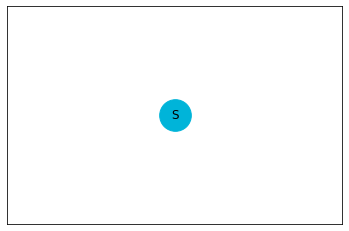

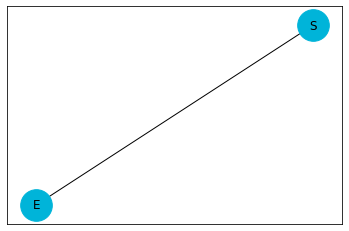

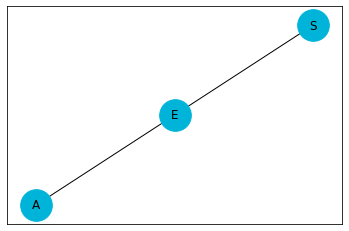

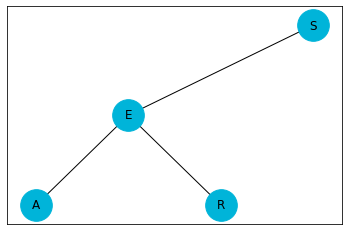

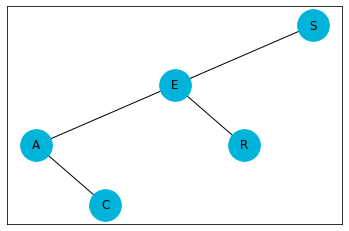

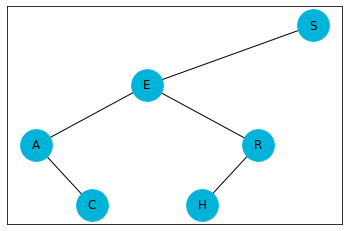

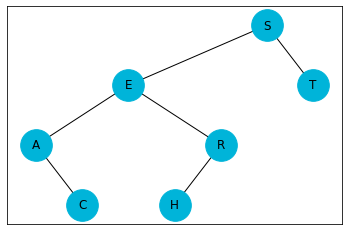

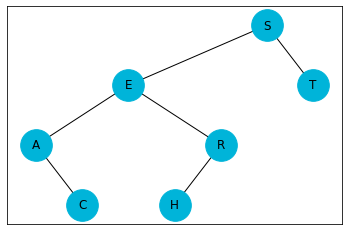

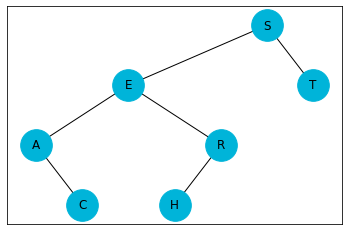

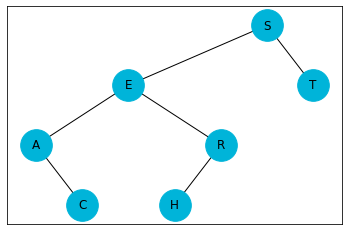

In [55]:
string = "SEARCHTREE"
bst = BST()
for (pos, char) in enumerate(string):
    bst.put(char, pos)
    showTree(bst)


#### Übung

Nun sind wir bereit, erste Experimente mit dem Baum durchzuführen. 

Probieren Sie folgendes aus:
* Was passiert, wenn Sie einen Schlüssel (mit unterschiedlichen Werten) zweimal einfügen?
* Was passiert, wenn Sie eine bereits sortiere Liste einfügen?
* Erstellen Sie jeweils 10 zufällige Sequenzen der Länge 10, 1000 und 100000, geben Sie die durchschnittliche Höhe der entsprechenden Bäume aus. Was beobachten Sie? 

***Ihre Antworten***
1. Antwort 1
2. Antwort 2
3. Antwort 3

#### Sortieren mit Binärsuchbäumen

Schauen Sie sich die Methode ```keys``` etwas genauer an. Diese führt eine inorder Traversierung durch und speichert den Schlüssel jeweils in einer Liste. Wie wir leicht überprüfen können, sind die Schlüssel aufsteigend sortiert.

In [56]:
bst.keys()

['A', 'C', 'E', 'H', 'R', 'S', 'T']

Dies führt zu einem einfachen Sortieralogrithmus. Wir starten mit einem unsortierten Array, fügen die Elementen der Reihe nach in einen Binärbaum ein, und nutzen dann die Methode ```keys``` um die sortierten Schlüssel zu erhalten. 

In [57]:
array = ['c', 'x', 'a', 'q', 'b']
bst = BST()
for k in array:
    bst.put(k, '')
sortedArray = bst.keys();
print(sortedArray)

['a', 'b', 'c', 'q', 'x']


### Übung

1. Was ist die worst-case Laufzeit dieses Algorithmus? Geben Sie die schlechtmöglichste Sequenz an
 

***Ihre Antworten***

* Ihre Antwort

### Löschen von Knoten

Nun zeigen wir noch eine Implementation der Löschoperationen nach Hibbard.
Der Code ist etwas trickreich. Zum Verständnis sollte man sich nochmals die drei Spezialfälle in Erinnerung rufen, die in den Folien besprochen wurden. Als weiterer Schlüssel zum Verständnis ist zu beachten, dass die Verweise auf den linken und rechten Teilbaum jeweils auf dem "Rückweg" neu gesetzt werden (analog der ```put``` Methode). Um ein Blatt zu löschen genügt es also, beim entsprechenden Node ```None``` zurückzugeben. 

In [61]:
class BSTWithDelete(BST): # Wir erben von BST, und ergänzen diesen um die Delete Operation
    
    def min(self):
        minNode = self._min(self._root)
        return minNode.key
        
    def _min(self, node):
        if node.left == None:
            return node
        else:
            return self._min(node.left)
        
    def deleteMin(self):
        self._deleteMin(self._root)

    def _deleteMin(self, node): 
        if node.left == None:
            return node.right;
        node.left = self._deleteMin(node.left);
        node.count = self._size(node.left) + self._size(node.right) + 1;
        return node;
    

    
    def delete(self, key):
        self.root = self._delete(self.root, key)
    
    def _delete(self, node, key):
        if node == None:
            return None;
        
        if  key < node.key: 
            node.left = self._delete(node.left, key)
        elif key > node.key:
            node.right = self._delete(node.right, key);
        else: # key == node.key (zu löschender Knoten)
            if node.right == None:
                return node.left
            if node.left == None:
                return node.right            
            t = node;
            node = self._min(t.right)
            node.right = self._deleteMin(t.right)
            node.left = t.left
            
        node.count = self._size(node.left) + self._size(node.right) + 1;
        return node

Der folgende Code illustriert, wie sich der Baum ändert, wenn wir einen Knoten löschen, welcher zwei Kinder hat. 

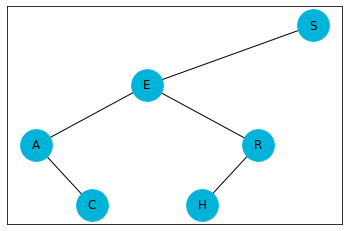

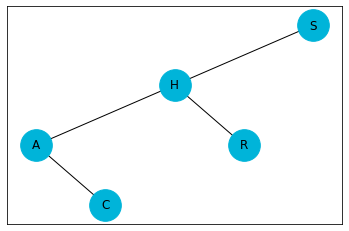

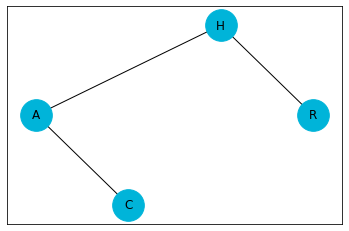

In [62]:
bst = BSTWithDelete()
for (num,key) in enumerate("SEARCH"):
    bst.put(key, num)
showTree(bst)

bst.delete("E")
showTree(bst)
bst.delete("S")
showTree(bst)